# Road Accident Analysis in Australia

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset.<br>
Information on location and characteristics of crashes in Queensland for all reported Road Traffic Crashes occurred from 1 January 2001 to 31 December 2021, fatal, hospitalisation, medical treatment and minor injury crashes to 31 December 2021 and property damage only crashes to 31 December 2010.

In [2]:
accidents = pd.read_csv(r"C:\Users\MTL9\Downloads\archive (30)\crash_data_queensland_1_crash_locations.csv")
accidents.head()

Crash_Ref_Number        Crash_Severity  Crash_Year Crash_Month  \
0                 1       Hospitalisation        2001     January   
1                 2  Property damage only        2001     January   
2                 3          Minor injury        2001     January   
3                 4  Property damage only        2001     January   
4                 5  Property damage only        2001     January   

  Crash_Day_Of_Week  Crash_Hour Crash_Nature      Crash_Type  Crash_Longitude  \
0            Monday           6      Head-on   Multi-Vehicle       153.052207   
1         Wednesday           9        Angle   Multi-Vehicle       153.064920   
2          Thursday           8     Rear-end   Multi-Vehicle       153.058444   
3            Sunday           8   Hit object  Single Vehicle       153.081083   
4           Tuesday          16   Overturned  Single Vehicle         0.000009   

   Crash_Latitude  ... Count_Casualty_MedicallyTreated  \
0      -27.586358  ...                               0   
1      -27.595907  ...                               0   
2      -27.599409  ...                               0   
3      -27.598882  ...                               0   
4       -0.000010  ...                               0   

  Count_Casualty_MinorInjury Count_Casualty_Total Count_Unit_Car  \
0                          0                    1              1   
1                          0                    0              2   
2                          1                    1              2   
3                          0                    0              1   
4                          0                    0              1   

  Count_Unit_Motorcycle_Moped Count_Unit_Truck Count_Unit_Bus  \
0                           0                0              0   
1                           0                0              0   
2                           0                0              0   
3                           0                0              0   
4                           0                0              0   

  Count_Unit_Bicycle Count_Unit_Pedestrian Count_Unit_Other  
0                  1                     0                0  
1                  0                     0                0  
2                  0                     0                0  
3                  0                     0                0  
4                  0                     0                0  

[5 rows x 52 columns]

In [3]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367230 entries, 0 to 367229
Data columns (total 52 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Crash_Ref_Number                 367230 non-null  int64  
 1   Crash_Severity                   367230 non-null  object 
 2   Crash_Year                       367230 non-null  int64  
 3   Crash_Month                      367230 non-null  object 
 4   Crash_Day_Of_Week                367230 non-null  object 
 5   Crash_Hour                       367230 non-null  int64  
 6   Crash_Nature                     367230 non-null  object 
 7   Crash_Type                       367230 non-null  object 
 8   Crash_Longitude                  367230 non-null  float64
 9   Crash_Latitude                   367230 non-null  float64
 10  Crash_Street                     367215 non-null  object 
 11  Crash_Street_Intersecting        159264 non-null  object 
 12  St

In [4]:
accidents.shape

(367230, 52)

In [5]:
accidents.columns = accidents.columns.str.lower()

In [6]:
accidents.columns

Index(['crash_ref_number', 'crash_severity', 'crash_year', 'crash_month',
       'crash_day_of_week', 'crash_hour', 'crash_nature', 'crash_type',
       'crash_longitude', 'crash_latitude', 'crash_street',
       'crash_street_intersecting', 'state_road_name', 'loc_suburb',
       'loc_local_government_area', 'loc_post_code', 'loc_police_division',
       'loc_police_district', 'loc_police_region',
       'loc_queensland_transport_region', 'loc_main_roads_region',
       'loc_abs_statistical_area_2', 'loc_abs_statistical_area_3',
       'loc_abs_statistical_area_4', 'loc_abs_remoteness',
       'loc_state_electorate', 'loc_federal_electorate',
       'crash_controlling_authority', 'crash_roadway_feature',
       'crash_traffic_control', 'crash_speed_limit',
       'crash_road_surface_condition', 'crash_atmospheric_condition',
       'crash_lighting_condition', 'crash_road_horiz_align',
       'crash_road_vert_align', 'crash_dca_code', 'crash_dca_description',
       'crash_dca_group_de

In [7]:
accidents.crash_severity.unique()

array(['Hospitalisation', 'Property damage only', 'Minor injury',
       'Medical treatment', 'Fatal'], dtype=object)

In [8]:
for col in accidents.select_dtypes('object').columns:
    print(col)
    print(accidents[col].unique())

crash_severity
['Hospitalisation' 'Property damage only' 'Minor injury'
 'Medical treatment' 'Fatal']
crash_month
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
crash_day_of_week
['Monday' 'Wednesday' 'Thursday' 'Sunday' 'Tuesday' 'Friday' 'Saturday']
crash_nature
['Head-on' 'Angle' 'Rear-end' 'Hit object' 'Overturned' 'Hit pedestrian'
 'Sideswipe' 'Hit parked vehicle' 'Fall from vehicle'
 'Non-collision - miscellaneous' 'Struck by external load'
 'Collision - miscellaneous' 'Other' 'Hit animal'
 'Struck by internal load']
crash_type
['Multi-Vehicle' 'Single Vehicle' 'Hit pedestrian' 'Other']
crash_street
['Gretel St' 'Gowan Rd' 'Hellawell Rd' ... 'Loombah Cres' 'Girton St'
 'Fleetwood Ct']
crash_street_intersecting
[nan 'Pinelands Rd' 'Persse Rd' ... 'Telopea St' 'Sim St' 'Crampton St']
state_road_name
[nan 'Mount Lindesay Arterial Road' 'Griffith Arterial Road'
 'Cunningham Arterial Road (Ipswich Motorway)'
 'Gateway E

['Brisbane City' 'Unknown' 'Moreton Bay Region' 'Logan City'
 'Scenic Rim Region' 'Gold Coast City' 'Redland City' 'Somerset Region'
 'Ipswich City' 'Sunshine Coast Region' 'Noosa Shire' 'Gympie Region'
 'Lockyer Valley Region' 'South Burnett Region' 'Southern Downs Region'
 'Toowoomba Region' 'Bundaberg Region' 'North Burnett Region'
 'Fraser Coast Region' 'Cherbourg Aboriginal Shire' 'Gladstone Region'
 'Banana Shire' 'Western Downs Region' 'Maranoa Region'
 'Goondiwindi Region' 'Balonne Shire' 'Longreach Region' 'Paroo Shire'
 'Bulloo Shire' 'Murweh Shire' 'Quilpie Shire' 'Blackall Tambo Region'
 'Barcaldine Region' 'Central Highlands Region'
 'Woorabinda Aboriginal Shire' 'Livingstone Shire' 'Rockhampton Region'
 'Isaac Region' 'Diamantina Shire' 'Barcoo Shire' 'Boulia Shire'
 'Cloncurry Shire' 'Winton Shire' 'Richmond Shire' 'Mackay Region'
 'Whitsunday Region' 'Burdekin Shire' 'Charters Towers Region'
 'Townsville City' 'Etheridge Shire' 'Hinchinbrook Shire'
 'Cassowary Coast Reg

['Sunnybank Hills' 'Runcorn' 'Unknown' 'Rocklea - Acacia Ridge'
 'Coopers Plains' 'Sunnybank' 'Calamvale - Stretton' 'Pallara - Willawong'
 'Kuraby' 'Algester' 'Annerley' 'Fairfield - Dutton Park' 'Yeronga'
 'Tarragindi' 'Greenslopes' 'Woolloongabba' 'Ashgrove' 'The Gap' 'Bardon'
 'Enoggera Reservoir' 'Samford Valley' 'Paddington - Milton'
 'Upper Kedron - Ferny Grove' 'Keperra' 'Auchenflower' 'Red Hill (qld)'
 'Camp Hill' 'Carindale' 'Carina' 'Morningside - Seven Hills'
 'Carina Heights' 'Cannon Hill' 'Coorparoo' 'Belmont - Gumdale'
 'Mount Gravatt' 'Mansfield (qld)' 'Brisbane City' 'Spring Hill'
 'Kelvin Grove - Herston' 'Fortitude Valley' 'Newstead - Bowen Hills'
 'Holland Park' 'New Farm' 'Albion' 'Holland Park West'
 'Upper Mount Gravatt' 'Wishart' 'Inala - Richlands'
 'Forest Lake - Doolandella' 'Hillcrest' 'Durack' 'Wacol' 'Darra - Sumner'
 'Greenbank Military Camp' 'Oxley (qld)' 'Indooroopilly' 'Chapel Hill'
 'Toowong' 'Mount Coot-tha' 'Fig Tree Pocket' 'Kenmore' 'St Lucia'
 'B

['Stretton' 'Unknown' 'Algester' 'Toohey' 'Miller' 'South Brisbane'
 'Greenslopes' 'Cooper' 'Maiwar' 'Pine Rivers' 'Ferny Grove' 'Bulimba'
 'Chatsworth' 'Mansfield' 'Mcconnel' 'Clayfield' 'Inala' 'Jordan'
 'Moggill' 'Mount Ommaney' 'Sandgate' 'Aspley' 'Murrumba' 'Everton'
 'Stafford' 'Woodridge' 'Springwood' 'Waterford' 'Lytton' 'Nudgee'
 'Scenic Rim' 'Macalister' 'Coomera' 'Logan' 'Pumicestone' 'Morayfield'
 'Kurwongbah' 'Bancroft' 'Glass House' 'Oodgeroo' 'Redlands' 'Nanango'
 'Ipswich West' 'Bundamba' 'Redcliffe' 'Capalaba' 'Ipswich'
 'Surfers Paradise' 'Mermaid Beach' 'Southport' 'Gaven' 'Mudgeeraba'
 'Burleigh' 'Caloundra' 'Kawana' 'Currumbin' 'Maroochydore' 'Ninderry'
 'Nicklin' 'Noosa' 'Theodore' 'Broadwater' 'Gympie' 'Lockyer' 'Buderim'
 'Bonney' 'Southern Downs' 'Condamine' 'Burnett' 'Bundaberg' 'Callide'
 'Maryborough' 'Hervey Bay' 'Toowoomba North' 'Toowoomba South' 'Warrego'
 'Gregory' 'Gladstone' 'Keppel' 'Rockhampton' 'Mirani' 'Burdekin'
 'Traeger' 'Whitsunday' 'Mackay' '

In [9]:
(accidents.isna().sum()/len(accidents))*100

crash_ref_number                    0.000000
crash_severity                      0.000000
crash_year                          0.000000
crash_month                         0.000000
crash_day_of_week                   0.000000
crash_hour                          0.000000
crash_nature                        0.000000
crash_type                          0.000000
crash_longitude                     0.000000
crash_latitude                      0.000000
crash_street                        0.004085
crash_street_intersecting          56.630994
state_road_name                    53.796803
loc_suburb                          0.000000
loc_local_government_area           0.000000
loc_post_code                       0.000000
loc_police_division                 0.000000
loc_police_district                 0.000000
loc_police_region                   0.000000
loc_queensland_transport_region     0.000000
loc_main_roads_region               0.000000
loc_abs_statistical_area_2          0.000000
loc_abs_st

In [10]:
accidents.drop(columns=['crash_street_intersecting','state_road_name'],inplace=True)

In [11]:
accidents.dropna(inplace=True)

In [12]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361728 entries, 0 to 367229
Data columns (total 50 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   crash_ref_number                 361728 non-null  int64  
 1   crash_severity                   361728 non-null  object 
 2   crash_year                       361728 non-null  int64  
 3   crash_month                      361728 non-null  object 
 4   crash_day_of_week                361728 non-null  object 
 5   crash_hour                       361728 non-null  int64  
 6   crash_nature                     361728 non-null  object 
 7   crash_type                       361728 non-null  object 
 8   crash_longitude                  361728 non-null  float64
 9   crash_latitude                   361728 non-null  float64
 10  crash_street                     361728 non-null  object 
 11  loc_suburb                       361728 non-null  object 
 12  lo

## Time Analysis

In [13]:
accidents.crash_hour.value_counts()

15    31016
16    29367
17    27016
8     24366
14    23122
11    20828
12    20466
13    19578
10    19060
18    18901
9     18847
7     17245
19    13626
6     11779
20    10747
21     9375
22     8363
5      7787
23     7070
0      5943
1      5015
4      4170
2      4156
3      3885
Name: crash_hour, dtype: int64

<AxesSubplot:>

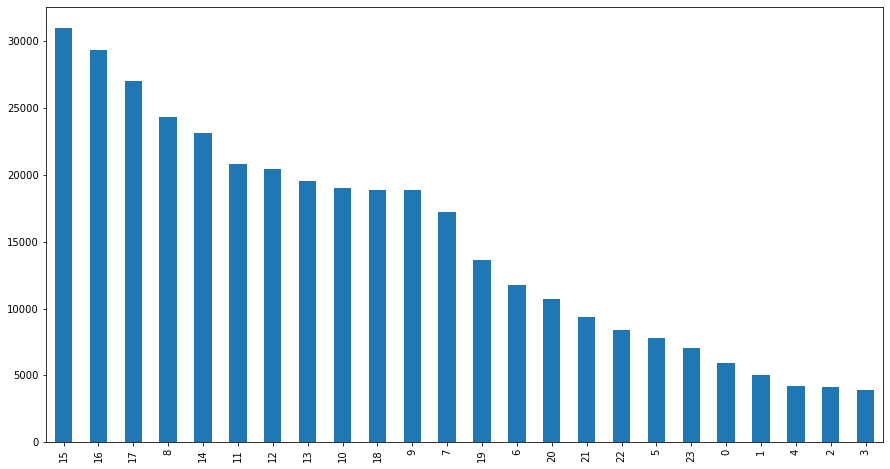

In [14]:
plt.figure(figsize=(15,8))
accidents.crash_hour.value_counts().plot(kind='bar')

Insights
Accidents in aus occurred mostly at 15 hours, 

Accidents occurs at the rush hours thus 15,16,17 hours when there a lot of traffic in town.<br>
and 8 am when there isd rush to work,schools and other events

In [15]:
accidents.crash_day_of_week.value_counts()

Friday       60950
Thursday     55289
Wednesday    53043
Tuesday      51298
Saturday     50985
Monday       48808
Sunday       41355
Name: crash_day_of_week, dtype: int64

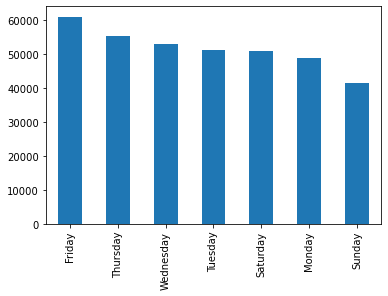

In [70]:
accidents.crash_day_of_week.value_counts().plot(kind='bar');

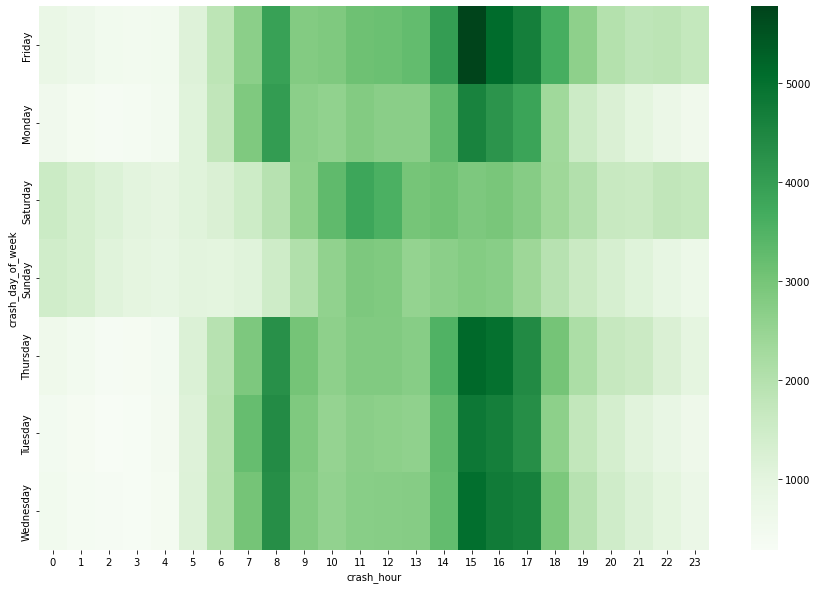

In [219]:
plt.figure(figsize=(15,10))
sns.heatmap(accidents.groupby(['crash_day_of_week','crash_hour']).size().unstack('crash_hour'),cmap='Greens');

Friday has the most accident count, 

In [17]:
accidents.groupby('crash_month').size().sort_values()

crash_month
January      26577
February     27808
December     29191
April        29273
September    29786
November     30423
June         30684
October      31041
March        31233
May          31624
July         31830
August       32258
dtype: int64

In [18]:
month_df = pd.DataFrame(accidents.crash_month.value_counts())

In [19]:
month_df

crash_month
August           32258
July             31830
May              31624
March            31233
October          31041
June             30684
November         30423
September        29786
April            29273
December         29191
February         27808
January          26577

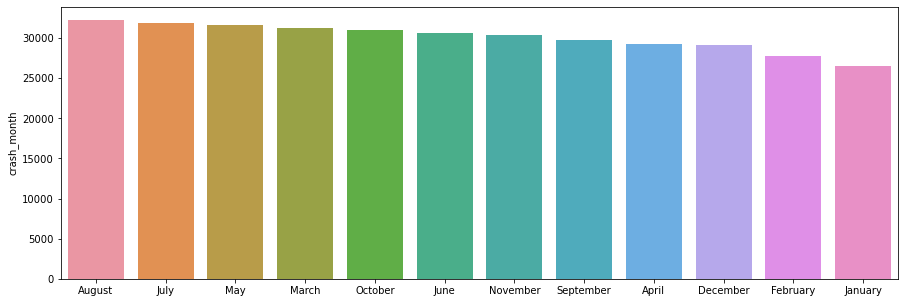

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(data=month_df,x=month_df.index,y='crash_month');

In [21]:
accidents.columns

Index(['crash_ref_number', 'crash_severity', 'crash_year', 'crash_month',
       'crash_day_of_week', 'crash_hour', 'crash_nature', 'crash_type',
       'crash_longitude', 'crash_latitude', 'crash_street', 'loc_suburb',
       'loc_local_government_area', 'loc_post_code', 'loc_police_division',
       'loc_police_district', 'loc_police_region',
       'loc_queensland_transport_region', 'loc_main_roads_region',
       'loc_abs_statistical_area_2', 'loc_abs_statistical_area_3',
       'loc_abs_statistical_area_4', 'loc_abs_remoteness',
       'loc_state_electorate', 'loc_federal_electorate',
       'crash_controlling_authority', 'crash_roadway_feature',
       'crash_traffic_control', 'crash_speed_limit',
       'crash_road_surface_condition', 'crash_atmospheric_condition',
       'crash_lighting_condition', 'crash_road_horiz_align',
       'crash_road_vert_align', 'crash_dca_code', 'crash_dca_description',
       'crash_dca_group_description', 'dca_key_approach_dir',
       'count_casua

In [22]:
severe_df = pd.DataFrame(accidents.crash_severity.value_counts())

In [23]:
severe_df

crash_severity
Medical treatment             112486
Hospitalisation               108415
Property damage only           86536
Minor injury                   49037
Fatal                           5254

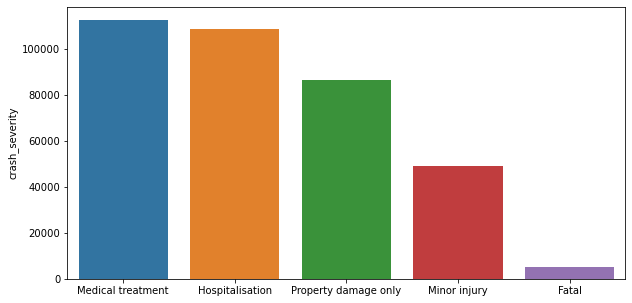

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(data=severe_df,x=severe_df.index,y='crash_severity');

Most accidents in australia leads to casualties going for medical treatment, or been hospitalised.

In [25]:
street_df =  pd.DataFrame(accidents.crash_street.value_counts().head(10))

In [26]:
street_df

crash_street
Bruce Hwy                      18153
Pacific Hwy                     6923
Gold Coast Hwy                  4575
Gateway Arterial Rd             3258
Warrego Hwy                     2554
Cunningham Hwy                  2312
Captain Cook Hwy                2236
South East Arterial Rd          2178
D'Aguilar Hwy                   1664
New England Hwy                 1629

In [67]:
?sns.barplot

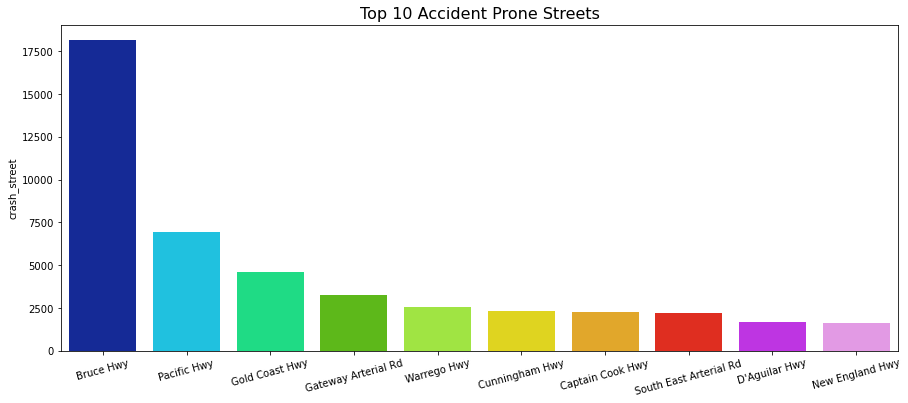

In [66]:
plt.figure(figsize=(15,6))
sns.barplot(data=street_df,x=street_df.index,y='crash_street',palette='gist_ncar')
plt.xticks(rotation=15)
plt.title('Top 10 Accident Prone Streets',fontsize=16);

Insights

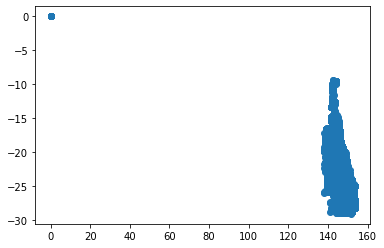

In [28]:
plt.scatter(accidents['crash_longitude'],accidents['crash_latitude'])

In [29]:
acc_2019 = accidents[accidents['crash_year']==2019]

In [39]:
year = [2006,2007,2009,2010]

In [30]:
import plotly.express as px

# Sample longitude and latitude data
data = {
    'longitude': [-74.006, -118.243, 139.691],
    'latitude': [40.7128, 34.0522, 35.6895]
}

fig = px.scatter_geo(data, lon='longitude', lat='latitude', title='Longitude and Latitude Scatter Plot')
fig.update_traces(marker=dict(size=10, color='blue', opacity=0.8),  # Customize marker style
                  selector=dict(mode='markers'))  # Apply customization to markers
fig.update_layout(legend=dict(title='Legend Title'),  # Customize legend title
                  geo=dict(showland=True, landcolor='lightgray'))  # Customize map appearance
fig.show()


In [34]:
?px.scatter_geo

In [38]:
fig = px.scatter_geo(acc_2019,lon='crash_longitude',lat='crash_latitude')
fig.show()

In [40]:
accidents.columns

Index(['crash_ref_number', 'crash_severity', 'crash_year', 'crash_month',
       'crash_day_of_week', 'crash_hour', 'crash_nature', 'crash_type',
       'crash_longitude', 'crash_latitude', 'crash_street', 'loc_suburb',
       'loc_local_government_area', 'loc_post_code', 'loc_police_division',
       'loc_police_district', 'loc_police_region',
       'loc_queensland_transport_region', 'loc_main_roads_region',
       'loc_abs_statistical_area_2', 'loc_abs_statistical_area_3',
       'loc_abs_statistical_area_4', 'loc_abs_remoteness',
       'loc_state_electorate', 'loc_federal_electorate',
       'crash_controlling_authority', 'crash_roadway_feature',
       'crash_traffic_control', 'crash_speed_limit',
       'crash_road_surface_condition', 'crash_atmospheric_condition',
       'crash_lighting_condition', 'crash_road_horiz_align',
       'crash_road_vert_align', 'crash_dca_code', 'crash_dca_description',
       'crash_dca_group_description', 'dca_key_approach_dir',
       'count_casua

In [44]:
alighh = pd.DataFrame(accidents['crash_road_horiz_align'].value_counts())

In [90]:
round((alighh['crash_road_horiz_align']/alighh['crash_road_horiz_align'].sum())*100,0)

Straight                  77.0
Curved - view open        18.0
Curved - view obscured     5.0
Name: crash_road_horiz_align, dtype: float64

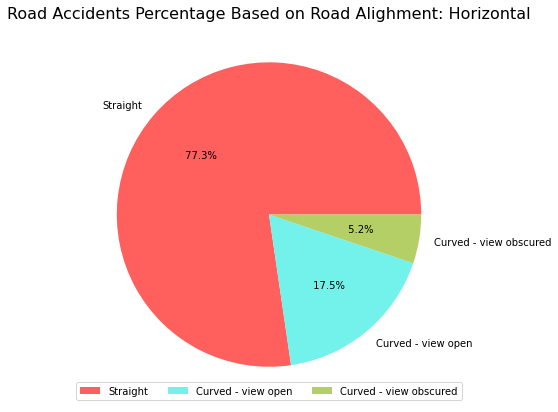

In [65]:
plt.figure(figsize=(7,7))
color = ['#FF5F5D','#72F2EB','#B4CF66']
plt.pie(alighh['crash_road_horiz_align'],labels=alighh.index,autopct='% .1f%%',colors=color)
plt.legend(loc='lower center',ncol=3)
plt.title('Road Accidents Percentage Based on Road Alighment: Horizontal',fontsize=16);

In [54]:
alighv = pd.DataFrame(accidents['crash_road_vert_align'].value_counts())

In [55]:
alighv

crash_road_vert_align
Level                 273099
Grade                  58019
Crest                  18149
Dip                    12461

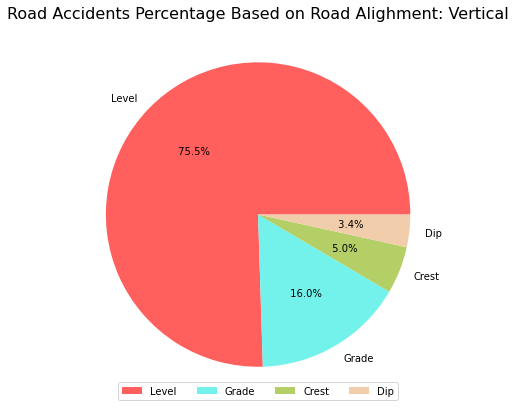

In [63]:
plt.figure(figsize=(7,7))
color = ['#FF5F5D','#72F2EB','#B4CF66','#F2CDAC']
plt.pie(alighv['crash_road_vert_align'],labels=alighv.index,autopct='% .1f%%',colors=color)
plt.legend(loc='lower center',ncol=4)
plt.title('Road Accidents Percentage Based on Road Alighment: Vertical',fontsize=16);

In [101]:
accidents.crash_speed_limit.unique()

array(['0 - 50 km/h', '60 km/h', '70 km/h', '80 - 90 km/h',
       '100 - 110 km/h'], dtype=object)

In [103]:
speed_df = pd.DataFrame(accidents.crash_speed_limit.value_counts())
speed_df

crash_speed_limit
60 km/h                    184341
100 - 110 km/h              62758
0 - 50 km/h                 58104
80 - 90 km/h                33732
70 km/h                     22793

In [107]:
speed_df['percent'] =round((speed_df['crash_speed_limit']/speed_df['crash_speed_limit'].sum())*100)
speed_df

crash_speed_limit  percent
60 km/h                    184341     51.0
100 - 110 km/h              62758     17.0
0 - 50 km/h                 58104     16.0
80 - 90 km/h                33732      9.0
70 km/h                     22793      6.0

In [115]:
round((speed_df['crash_speed_limit']/361728)*100,3)

60 km/h           50.961
100 - 110 km/h    17.350
0 - 50 km/h       16.063
80 - 90 km/h       9.325
70 km/h            6.301
Name: crash_speed_limit, dtype: float64

In [109]:
speed_df['crash_speed_limit'].sum()

361728

In [113]:
round(2.1111156)

2

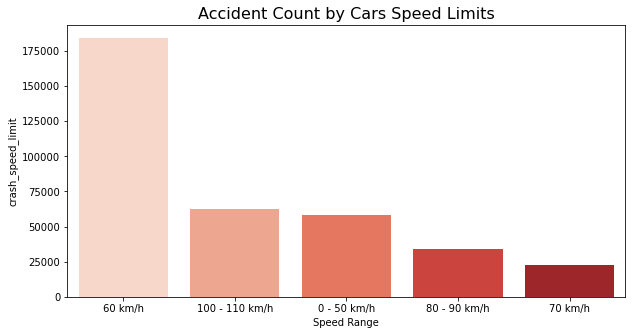

In [141]:
plt.figure(figsize=(10,5))
sns.barplot(data=speed_df,x=speed_df.index,y=speed_df['crash_speed_limit'],palette='Reds')
plt.title('Accident Count by Cars Speed Limits',fontsize=16)
plt.xlabel('Speed Range');

In [143]:
accidents.groupby(['crash_speed_limit','crash_severity']).size().unstack('crash_speed_limit')

crash_speed_limit     0 - 50 km/h  100 - 110 km/h  60 km/h  70 km/h  \
crash_severity                                                        
Fatal                         431            2416     1288      260   
Hospitalisation             17468           22610    49541     6898   
Medical treatment           18390           16017    60975     7635   
Minor injury                 8301            6608    27261     3080   
Property damage only        13514           15107    45276     4920   

crash_speed_limit     80 - 90 km/h  
crash_severity                      
Fatal                          859  
Hospitalisation              11898  
Medical treatment             9469  
Minor injury                  3787  
Property damage only          7719

In [127]:
speed_severity_df = accidents.groupby(['crash_speed_limit','crash_severity']).size().unstack('crash_severity')
speed_severity_df

crash_severity     Fatal  Hospitalisation  Medical treatment  Minor injury  \
crash_speed_limit                                                            
0 - 50 km/h          431            17468              18390          8301   
100 - 110 km/h      2416            22610              16017          6608   
60 km/h             1288            49541              60975         27261   
70 km/h              260             6898               7635          3080   
80 - 90 km/h         859            11898               9469          3787   

crash_severity     Property damage only  
crash_speed_limit                        
0 - 50 km/h                       13514  
100 - 110 km/h                    15107  
60 km/h                           45276  
70 km/h                            4920  
80 - 90 km/h                       7719

In [133]:
speed_severity_df['fatal_percentage']= round((speed_severity_df[['Fatal']]/speed_severity_df[['Fatal']].sum())*100)

In [136]:
fatal_df = speed_severity_df[['Fatal','fatal_percentage']]
fatal_df

crash_severity     Fatal  fatal_percentage
crash_speed_limit                         
0 - 50 km/h          431               8.0
100 - 110 km/h      2416              46.0
60 km/h             1288              25.0
70 km/h              260               5.0
80 - 90 km/h         859              16.0

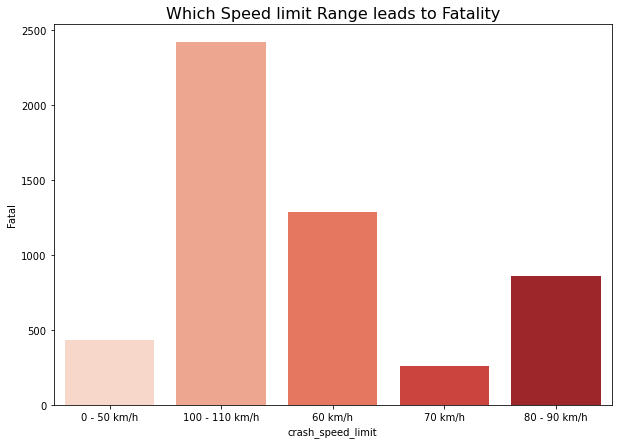

In [140]:
plt.figure(figsize=(10,7))
sns.barplot(data=fatal_df,x=fatal_df.index,y='Fatal',palette='Reds')
plt.title('Which Speed limit Range leads to Fatality',fontsize=16);

In [147]:
accidents.crash_traffic_control.unique()

array(['No traffic control', 'Operating traffic lights', 'Give way sign',
       'Flashing amber lights', 'Stop sign', 'Pedestrian crossing sign',
       'Pedestrian operated lights', 'Police', 'LATM device',
       'Road/Rail worker', 'Railway - lights and boom gate',
       'Supervised school crossing', 'School crossing - flags',
       'Miscellaneous', 'Railway - lights only', 'Railway crossing sign'],
      dtype=object)

In [149]:
traffic_df = pd.DataFrame(accidents.crash_traffic_control.value_counts())
traffic_df

crash_traffic_control
No traffic control                             250037
Operating traffic lights                        52633
Give way sign                                   42600
Stop sign                                       12339
Pedestrian crossing sign                         1931
Pedestrian operated lights                        574
Road/Rail worker                                  477
Railway - lights only                             280
Police                                            270
Railway - lights and boom gate                    187
Flashing amber lights                             110
LATM device                                        99
Railway crossing sign                              81
Supervised school crossing                         58
Miscellaneous                                      29
School crossing - flags                            23

In [156]:
accidents[accidents['crash_traffic_control']=='No traffic control']['crash_street'].nunique()

20852

In [160]:
traffic_df['traffic percent']= round(traffic_df['crash_traffic_control']/traffic_df['crash_traffic_control'].sum()*100,2)
traffic_df

crash_traffic_control  traffic percent
No traffic control                             250037            69.12
Operating traffic lights                        52633            14.55
Give way sign                                   42600            11.78
Stop sign                                       12339             3.41
Pedestrian crossing sign                         1931             0.53
Pedestrian operated lights                        574             0.16
Road/Rail worker                                  477             0.13
Railway - lights only                             280             0.08
Police                                            270             0.07
Railway - lights and boom gate                    187             0.05
Flashing amber lights                             110             0.03
LATM device                                        99             0.03
Railway crossing sign                              81             0.02
Supervised school crossing                         58             0.02
Miscellaneous                                      29             0.01
School crossing - flags                            23             0.01

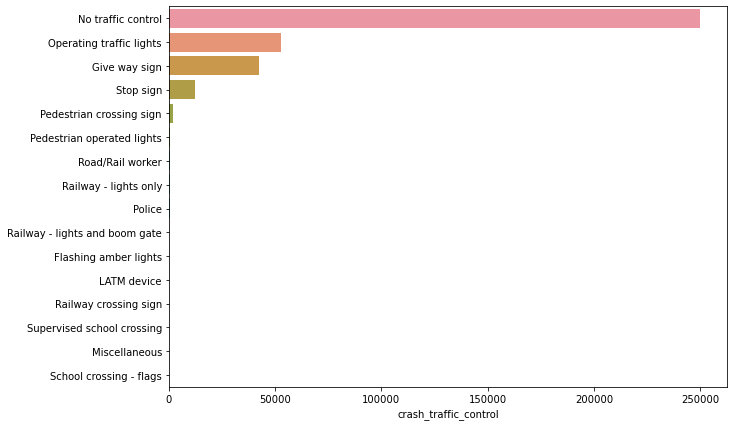

In [178]:
plt.figure(figsize=(10,7))
sns.barplot(data=traffic_df,y=traffic_df.index,x=traffic_df.crash_traffic_control,orient='h');

In [168]:
accidents['crash_traffic_control'].unique()

array(['No traffic control', 'Operating traffic lights', 'Give way sign',
       'Flashing amber lights', 'Stop sign', 'Pedestrian crossing sign',
       'Pedestrian operated lights', 'Police', 'LATM device',
       'Road/Rail worker', 'Railway - lights and boom gate',
       'Supervised school crossing', 'School crossing - flags',
       'Miscellaneous', 'Railway - lights only', 'Railway crossing sign'],
      dtype=object)

In [171]:
others= ['Pedestrian crossing sign','Flashing amber lights',
       'Pedestrian operated lights', 'Police', 'LATM device',
       'Road/Rail worker', 'Railway - lights and boom gate',
       'Supervised school crossing', 'School crossing - flags',
       'Miscellaneous', 'Railway - lights only', 'Railway crossing sign']

In [173]:
def haha(x):
    if x in others:
        return 'others'
    else:
        return x

In [175]:
accidents['crash_traffic_control'].apply(haha).unique()

array(['No traffic control', 'Operating traffic lights', 'Give way sign',
       'others', 'Stop sign'], dtype=object)

In [179]:
haha('Stop sign')

'Stop sign'

In [180]:
haha('School crossing - flags')

'others'

In [176]:
accidents['crash_traffic_control_new'] = accidents['crash_traffic_control'].apply(haha)

In [177]:
accidents['crash_traffic_control_new']

0               No traffic control
1               No traffic control
2         Operating traffic lights
3         Operating traffic lights
4               No traffic control
                    ...           
367225    Operating traffic lights
367226    Operating traffic lights
367227    Operating traffic lights
367228          No traffic control
367229          No traffic control
Name: crash_traffic_control_new, Length: 361728, dtype: object

In [181]:
traffic_df_new = pd.DataFrame(accidents.crash_traffic_control_new.value_counts())
traffic_df_new

crash_traffic_control_new
No traffic control                           250037
Operating traffic lights                      52633
Give way sign                                 42600
Stop sign                                     12339
others                                         4119

In [182]:
traffic_df_new['traffic percent']= round(traffic_df_new['crash_traffic_control_new']/traffic_df_new['crash_traffic_control_new'].sum()*100,2)
traffic_df_new

crash_traffic_control_new  traffic percent
No traffic control                           250037            69.12
Operating traffic lights                      52633            14.55
Give way sign                                 42600            11.78
Stop sign                                     12339             3.41
others                                         4119             1.14

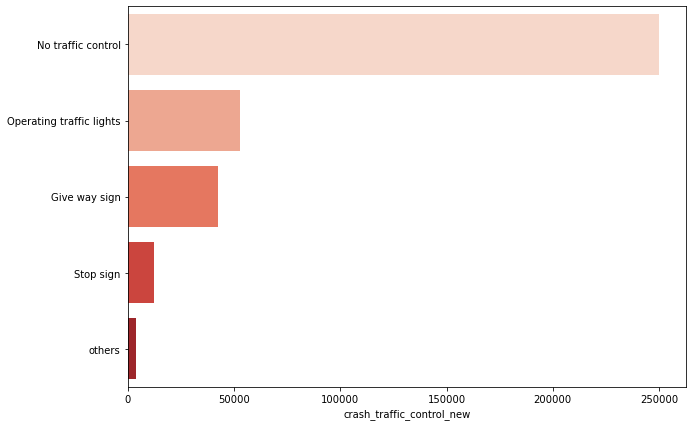

In [187]:
plt.figure(figsize=(10,7))
sns.barplot(data=traffic_df_new,y=traffic_df_new.index,
            x=traffic_df_new.crash_traffic_control_new,orient='h',palette='Reds');

## What was the condition of the road?

In [189]:
accidents.crash_road_surface_condition.unique()

array(['Sealed - Dry', 'Unsealed - Dry', 'Sealed - Wet', 'Unknown',
       'Unsealed - Wet'], dtype=object)

In [191]:
surface_df = pd.DataFrame(accidents.crash_road_surface_condition.value_counts())
surface_df

crash_road_surface_condition
Sealed - Dry                          297214
Sealed - Wet                           54533
Unsealed - Dry                          8542
Unsealed - Wet                          1128
Unknown                                  311

In [195]:
surface_df['surfacepercent'] =round(surface_df['crash_road_surface_condition']/surface_df['crash_road_surface_condition'].sum()*100,2)

In [196]:
surface_df

crash_road_surface_condition  surfacepercent
Sealed - Dry                          297214           82.17
Sealed - Wet                           54533           15.08
Unsealed - Dry                          8542            2.36
Unsealed - Wet                          1128            0.31
Unknown                                  311            0.09

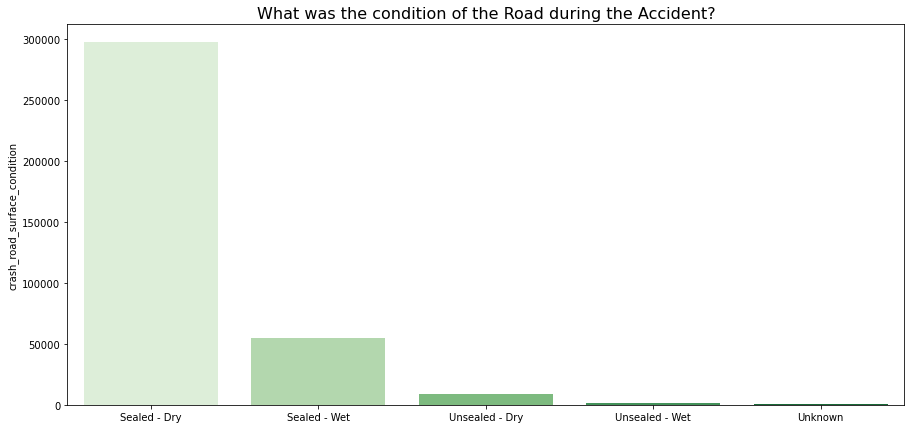

In [202]:
plt.figure(figsize=(15,7))
sns.barplot(data=surface_df,x=surface_df.index,y='crash_road_surface_condition',palette='Greens')
plt.title('What was the condition of the Road during the Accident?',fontsize=16);

In [204]:
accidents.crash_atmospheric_condition.unique()

array(['Clear', 'Raining', 'Unknown', 'Fog', 'Smoke/Dust'], dtype=object)

In [206]:
atmosphere_df = pd.DataFrame(accidents.crash_atmospheric_condition.value_counts())
atmosphere_df

crash_atmospheric_condition
Clear                            316811
Raining                           42143
Fog                                1832
Smoke/Dust                          724
Unknown                             218

In [210]:
atmosphere_df['atmosphere_percent'] = round(atmosphere_df['crash_atmospheric_condition']/atmosphere_df['crash_atmospheric_condition'].sum()*100,2)

In [211]:
atmosphere_df

crash_atmospheric_condition  atmosphere_percent
Clear                            316811               87.58
Raining                           42143               11.65
Fog                                1832                0.51
Smoke/Dust                          724                0.20
Unknown                             218                0.06

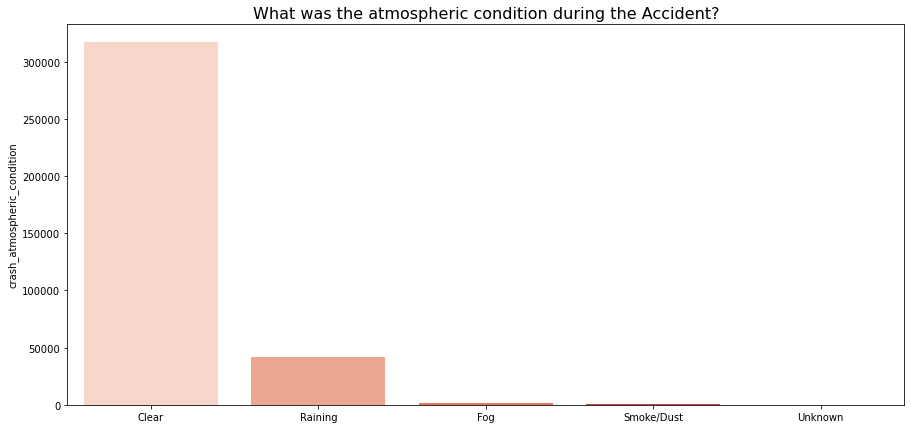

In [215]:
plt.figure(figsize=(15,7))
sns.barplot(data=atmosphere_df,x=atmosphere_df.index,y=atmosphere_df.crash_atmospheric_condition,palette='Reds')
plt.title('What was the atmospheric condition during the Accident?',fontsize=16);

In [220]:
accidents.columns

Index(['crash_ref_number', 'crash_severity', 'crash_year', 'crash_month',
       'crash_day_of_week', 'crash_hour', 'crash_nature', 'crash_type',
       'crash_longitude', 'crash_latitude', 'crash_street', 'loc_suburb',
       'loc_local_government_area', 'loc_post_code', 'loc_police_division',
       'loc_police_district', 'loc_police_region',
       'loc_queensland_transport_region', 'loc_main_roads_region',
       'loc_abs_statistical_area_2', 'loc_abs_statistical_area_3',
       'loc_abs_statistical_area_4', 'loc_abs_remoteness',
       'loc_state_electorate', 'loc_federal_electorate',
       'crash_controlling_authority', 'crash_roadway_feature',
       'crash_traffic_control', 'crash_speed_limit',
       'crash_road_surface_condition', 'crash_atmospheric_condition',
       'crash_lighting_condition', 'crash_road_horiz_align',
       'crash_road_vert_align', 'crash_dca_code', 'crash_dca_description',
       'crash_dca_group_description', 'dca_key_approach_dir',
       'count_casua

In [222]:
accidents.crash_nature.unique()

array(['Head-on', 'Angle', 'Rear-end', 'Hit object', 'Overturned',
       'Hit pedestrian', 'Sideswipe', 'Hit parked vehicle',
       'Fall from vehicle', 'Non-collision - miscellaneous',
       'Struck by external load', 'Collision - miscellaneous',
       'Hit animal', 'Other', 'Struck by internal load'], dtype=object)

In [225]:
nature_df = pd.DataFrame(accidents.crash_nature.value_counts())
nature_df

crash_nature
Angle                                107631
Rear-end                              89479
Hit object                            79189
Overturned                            18598
Sideswipe                             17019
Hit pedestrian                        14341
Hit parked vehicle                    11802
Fall from vehicle                      9800
Head-on                                8720
Hit animal                             3527
Non-collision - miscellaneous           768
Struck by external load                 462
Collision - miscellaneous               333
Other                                    41
Struck by internal load                  18

In [226]:
nature_df['nature_percent'] = round(nature_df['crash_nature']/nature_df['crash_nature'].sum()*100,2)
nature_df

crash_nature  nature_percent
Angle                                107631           29.75
Rear-end                              89479           24.74
Hit object                            79189           21.89
Overturned                            18598            5.14
Sideswipe                             17019            4.70
Hit pedestrian                        14341            3.96
Hit parked vehicle                    11802            3.26
Fall from vehicle                      9800            2.71
Head-on                                8720            2.41
Hit animal                             3527            0.98
Non-collision - miscellaneous           768            0.21
Struck by external load                 462            0.13
Collision - miscellaneous               333            0.09
Other                                    41            0.01
Struck by internal load                  18            0.00

<AxesSubplot:xlabel='crash_nature'>

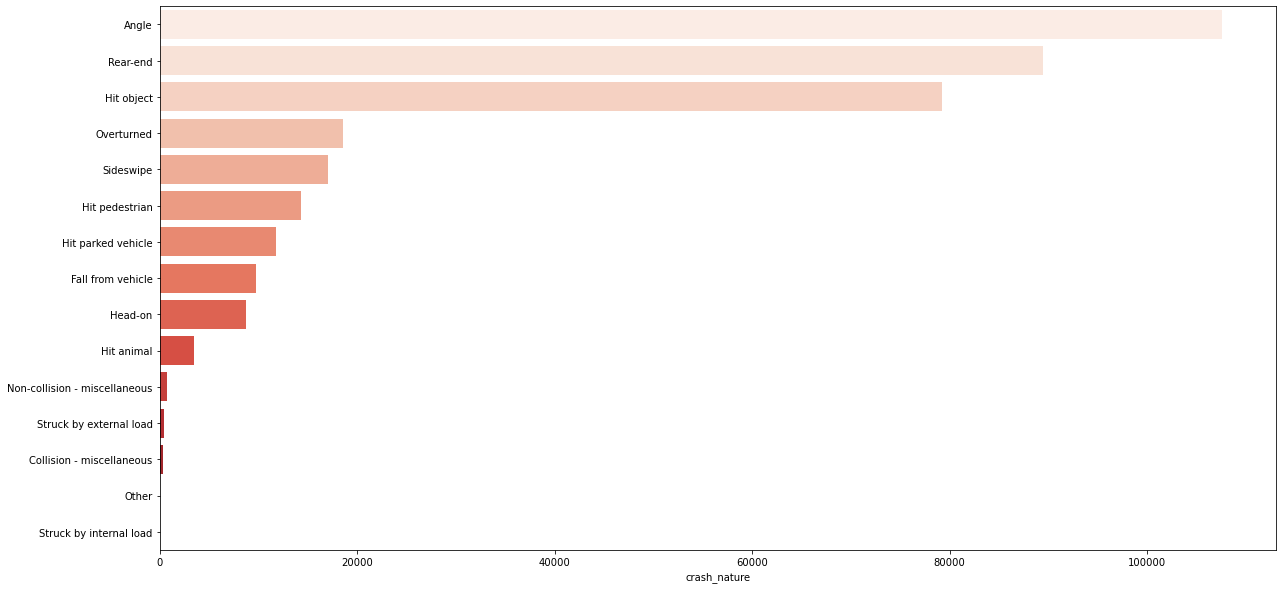

In [231]:
plt.figure(figsize=(20,10))
sns.barplot(data=nature_df,y=nature_df.index,x=nature_df['crash_nature'],orient='h',palette='Reds')

In [233]:
accidents.crash_type.unique()

array(['Multi-Vehicle', 'Single Vehicle', 'Hit pedestrian', 'Other'],
      dtype=object)

In [237]:
type_df = pd.DataFrame(accidents.crash_type.value_counts())
type_df

crash_type
Multi-Vehicle       222849
Single Vehicle      119389
Hit pedestrian       14341
Other                 5149

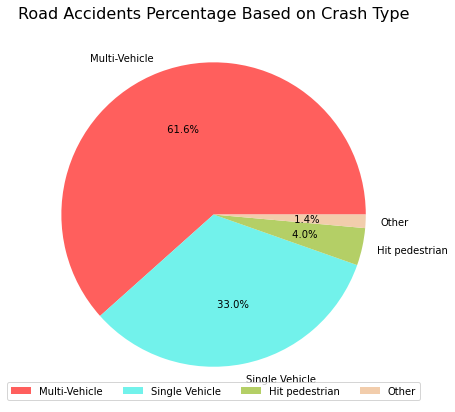

In [248]:
plt.figure(figsize=(7,7))
color = ['#FF5F5D','#72F2EB','#B4CF66','#F2CDAC']
plt.pie(type_df['crash_type'],labels=type_df.index,autopct='% .1f%%',colors=color)
plt.legend(loc='lower center',ncol=4)
plt.title('Road Accidents Percentage Based on Crash Type',fontsize=16);